In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import scipy
from scipy.optimize import curve_fit
import os
import powerlaw
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
def firstStep(CompSize, N, thresh):
    #find index i+1 such that C(i)/n <= thresh and C(i+1)/n > thresh
    for i in range(len(CompSize) - 1):
        if CompSize[i + 1]/N >= thresh and CompSize[i]/N < thresh:
            break
    return i + 1

def lastStep(CompSize, N, gamma):
    #find index i+1 such that C(i)/n <= thresh and C(i+1)/n > thresh
    for i in range(len(CompSize) - 1):
        if CompSize[i + 1] >= N**gamma and CompSize[i] < N**gamma:
            break
    return i


#import for scaling study
usePR = 0
Nvals = [100,200,500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000] + list(range(round(1e5), round(10.5e5), round(1e5)));
Nvals = np.sort(list(set(Nvals)));

t0vals = np.zeros([19,20])
t1vals = np.zeros([19,20])
deltaVals = np.zeros([19,20])
maxEdge = np.zeros([19,20])
compSizesER = []

ERexists = np.zeros([19,20])
PRexists = np.zeros([19,20])

r = 1.0

for j in range(19):
    csN = []
    for i in range(20):
        N = Nvals[j]            
        
        if usePR == 1:
            preString = 'PR'
            seed = int(N) + i + 1         
        else:
            preString = 'ER'
            seed = int(N) + i + 1                

        if Nvals[j] == 200000:
            r = 1.5
            seed = int(N) + i  + 1      
        else:
            r = 1.0             

        savePath = preString + '_N' + str(N) + '_seed' + str(seed) + '_r' + str(r) + '.hdf5'
        
        if os.path.exists(savePath) and os.path.isfile(savePath):
            print(savePath)

            ERexists[j][i] = 1
            with h5py.File(savePath, "r") as f:
                cs = f['compsize']
                compsize = cs[:]
                csN.append(compsize)
                r = f['r'][()]
                delta = f['delta'][()]
                t0 = f['t0'][()]
                t1 = f['t1'][()]
                N  = f['N'][()]
                seed = f['seed'][()]
                sds = f['saveDisc']
                saveDisc  = sds[:]    
                sss = f['saveSize']
                saveSize  = sss[:]   
                sns = f['snapshots']
                snapshots  = sns[:] 
                t0vals[j][i] = t0 # lastStep(cs[:], N, 0.5)
                t1vals[j][i] = t1 # firstStep(cs[:], N, 0.5)
                deltaVals[j][i] = t1 - t0
                maxEdge[j][i] = np.max(cs[2:] - cs[1:-1])
                csN.append(np.copy(cs[:]))
            
    compSizesER.append(np.copy(csN))
            
            
t0valsER = np.copy(t0vals)
t1valsER = np.copy(t1vals)
maxEdgeER = np.copy(maxEdge)


t0vals = np.zeros([19,20])
t1vals = np.zeros([19,20])
deltaVals = np.zeros([19,20])
maxEdge = np.zeros([19,20])

compSizesPR = []
usePR = 1
for j in range(19):
    csN = []
    for i in range(20):
        N = Nvals[j]  
        
        if usePR == 1:
            preString = 'PR'
            seed = int(N) + i + 1         
        else:
            preString = 'ER'
            seed = int(N) + i + 1                

        if Nvals[j] == 200000:
            r = 1.5
            seed = int(N) + i  + 1     
        else:
            r = 1.0             
          
            
        savePath = preString + '_N' + str(N) + '_seed' + str(seed) + '_r' + str(r) + '.hdf5'
        if os.path.exists(savePath) and os.path.isfile(savePath):
            print(savePath)
            PRexists[j][i] = 1            
            with h5py.File(savePath, "r") as f:
                cs = f['compsize']
                compsize = cs[:]
                csN.append(compsize)            
                r = f['r'][()]
                delta = f['delta'][()]
                t0 = f['t0'][()]
                t1 = f['t1'][()]
                N  = f['N'][()]
                seed = f['seed'][()]
                sds = f['saveDisc']
                saveDisc  = sds[:]    
                sss = f['saveSize']
                saveSize  = sss[:]   
                sns = f['snapshots']
                snapshots  = sns[:] 
                t0vals[j][i] = t0 #lastStep(cs[:], N, 0.5)
                t1vals[j][i] = t1 # firstStep(cs[:], N, 0.5)
                deltaVals[j][i] = t1 - t0
                maxEdge[j][i] = np.max(compsize[2:] - compsize[1:-1])           
                csN.append(np.copy(cs[:]))
    
    compSizesPR.append(np.copy(csN))
            
t0valsPR = np.copy(t0vals)
t1valsPR = np.copy(t1vals)
maxEdgePR = np.copy(maxEdge)

scaleER = 20/np.sum(ERexists, axis = 1)
scalePR = 20/np.sum(PRexists, axis = 1)
print(scaleER)
print(scalePR)

ER_N100_seed101_r1.0.hdf5
ER_N100_seed102_r1.0.hdf5
ER_N100_seed103_r1.0.hdf5
ER_N100_seed104_r1.0.hdf5
ER_N100_seed105_r1.0.hdf5
ER_N100_seed106_r1.0.hdf5
ER_N100_seed107_r1.0.hdf5
ER_N100_seed108_r1.0.hdf5
ER_N100_seed109_r1.0.hdf5
ER_N100_seed110_r1.0.hdf5
ER_N100_seed111_r1.0.hdf5
ER_N100_seed112_r1.0.hdf5
ER_N100_seed113_r1.0.hdf5
ER_N100_seed114_r1.0.hdf5
ER_N100_seed115_r1.0.hdf5
ER_N100_seed116_r1.0.hdf5
ER_N100_seed117_r1.0.hdf5
ER_N100_seed118_r1.0.hdf5
ER_N100_seed119_r1.0.hdf5
ER_N100_seed120_r1.0.hdf5
ER_N200_seed201_r1.0.hdf5
ER_N200_seed202_r1.0.hdf5
ER_N200_seed203_r1.0.hdf5
ER_N200_seed204_r1.0.hdf5
ER_N200_seed205_r1.0.hdf5
ER_N200_seed206_r1.0.hdf5
ER_N200_seed207_r1.0.hdf5
ER_N200_seed208_r1.0.hdf5
ER_N200_seed209_r1.0.hdf5
ER_N200_seed210_r1.0.hdf5
ER_N200_seed211_r1.0.hdf5
ER_N200_seed212_r1.0.hdf5
ER_N200_seed213_r1.0.hdf5
ER_N200_seed214_r1.0.hdf5
ER_N200_seed215_r1.0.hdf5
ER_N200_seed216_r1.0.hdf5
ER_N200_seed217_r1.0.hdf5
ER_N200_seed218_r1.0.hdf5
ER_N200_seed

ER_N600000_seed600002_r1.0.hdf5
ER_N600000_seed600003_r1.0.hdf5
ER_N600000_seed600004_r1.0.hdf5
ER_N600000_seed600005_r1.0.hdf5
ER_N600000_seed600006_r1.0.hdf5
ER_N600000_seed600007_r1.0.hdf5
ER_N600000_seed600008_r1.0.hdf5
ER_N600000_seed600009_r1.0.hdf5
ER_N600000_seed600010_r1.0.hdf5
ER_N600000_seed600011_r1.0.hdf5
ER_N600000_seed600012_r1.0.hdf5
ER_N600000_seed600013_r1.0.hdf5
ER_N600000_seed600014_r1.0.hdf5
ER_N600000_seed600015_r1.0.hdf5
ER_N600000_seed600016_r1.0.hdf5
ER_N600000_seed600017_r1.0.hdf5
ER_N600000_seed600018_r1.0.hdf5
ER_N600000_seed600019_r1.0.hdf5
ER_N600000_seed600020_r1.0.hdf5
ER_N700000_seed700001_r1.0.hdf5
ER_N700000_seed700002_r1.0.hdf5
ER_N700000_seed700003_r1.0.hdf5
ER_N700000_seed700004_r1.0.hdf5
ER_N700000_seed700005_r1.0.hdf5
ER_N700000_seed700006_r1.0.hdf5
ER_N700000_seed700007_r1.0.hdf5
ER_N700000_seed700008_r1.0.hdf5
ER_N700000_seed700009_r1.0.hdf5
ER_N700000_seed700010_r1.0.hdf5
ER_N700000_seed700011_r1.0.hdf5
ER_N700000_seed700012_r1.0.hdf5
ER_N7000

PR_N100000_seed100015_r1.0.hdf5
PR_N100000_seed100016_r1.0.hdf5
PR_N100000_seed100017_r1.0.hdf5
PR_N100000_seed100018_r1.0.hdf5
PR_N100000_seed100019_r1.0.hdf5
PR_N100000_seed100020_r1.0.hdf5
PR_N200000_seed200001_r1.5.hdf5
PR_N200000_seed200002_r1.5.hdf5
PR_N200000_seed200003_r1.5.hdf5
PR_N200000_seed200004_r1.5.hdf5
PR_N200000_seed200005_r1.5.hdf5
PR_N200000_seed200006_r1.5.hdf5
PR_N200000_seed200007_r1.5.hdf5
PR_N200000_seed200008_r1.5.hdf5
PR_N200000_seed200009_r1.5.hdf5
PR_N200000_seed200010_r1.5.hdf5
PR_N200000_seed200011_r1.5.hdf5
PR_N200000_seed200012_r1.5.hdf5
PR_N200000_seed200013_r1.5.hdf5
PR_N200000_seed200014_r1.5.hdf5
PR_N200000_seed200015_r1.5.hdf5
PR_N200000_seed200016_r1.5.hdf5
PR_N200000_seed200017_r1.5.hdf5
PR_N200000_seed200018_r1.5.hdf5
PR_N200000_seed200019_r1.5.hdf5
PR_N200000_seed200020_r1.5.hdf5
PR_N300000_seed300001_r1.0.hdf5
PR_N300000_seed300002_r1.0.hdf5
PR_N300000_seed300003_r1.0.hdf5
PR_N300000_seed300004_r1.0.hdf5
PR_N300000_seed300005_r1.0.hdf5
PR_N3000

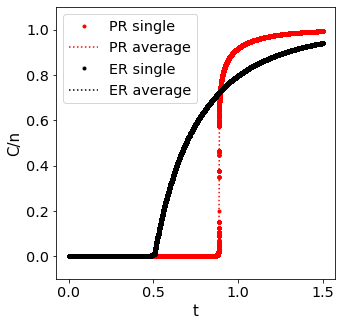

In [31]:
j = 10
N = Nvals[j]
steps = 1.5*N
C_ER = compSizesER[j][0]
C_PR = compSizesPR[j][0]


C_ERav = np.zeros(len(C_ER))
C_PRav = np.zeros(len(C_ER))
for i in range(len(C_ER)):
    for ii in range(20):
        C_ERav[i] += compSizesER[j][ii][i]/20
        C_PRav[i] += compSizesPR[j][ii][i]/20



#Comparison single instance
plt.figure(figsize=(5, 5))
plt.plot(np.arange(steps)/N, C_PR/N, 'r.', label = 'PR single')
plt.plot(np.arange(steps)/N, C_PRav/N, 'r:', label = 'PR average')
plt.plot(np.arange(steps)/N, C_ER/N, 'k.', label = 'ER single')
plt.plot(np.arange(steps)/N, C_ERav/N, 'k:', label = 'ER average')
plt.xlabel('t',fontsize=15)
plt.ylabel('C/n',fontsize=15)
plt.ylim([-0.1, 1.1])
plt.legend()
#plt.title('ER vs PR 2e5 nodes')
plt.savefig("ERvsPR.png", bbox_inches='tight', dpi=600)

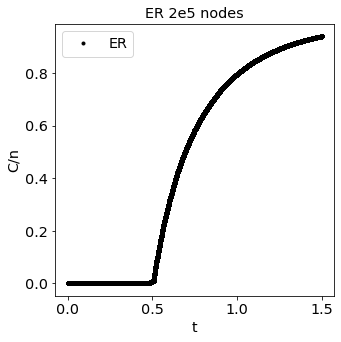

In [28]:
j = 10
N = Nvals[j]
steps = 1.5*N
C_ER = compSizesER[j][0]
C_PR = compSizesPR[j][0]


#Comparison single instance
plt.figure()
plt.plot(np.arange(steps)/N, C_ER/N, 'k.', label = 'ER')
plt.xlabel('t')
plt.ylabel('C/n')
plt.legend()
plt.title('ER 2e5 nodes')
plt.savefig("ER.png", bbox_inches='tight', dpi=600)

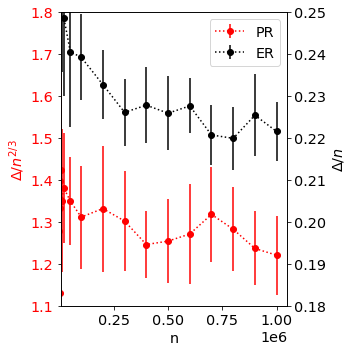

In [34]:
fig, ax1 = plt.subplots(figsize=(5, 5))

color = 'red'
ax1.set_xlabel('n')
ax1.set_ylabel(r'$\Delta/n^{2/3}$', color=color)
ax1.errorbar(Nvals, np.mean(t1valsPR-t0valsPR, axis = 1)/np.power(Nvals,2/3), np.std(t1valsPR-t0valsPR, axis = 1)/np.power(Nvals,2/3), fmt='ro:', label='PR')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([1.1, 1.8])
handles1, labels1 = ax1.get_legend_handles_labels()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
lns2 = ax2.errorbar(Nvals, np.mean(t1valsER-t0valsER, axis = 1)/Nvals, np.std(t1valsER-t0valsER, axis = 1)/Nvals, fmt='ko:', label='ER')
ax2.set_ylabel(r'$\Delta /n$', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim([0.05e5, 1.05e6])
ax2.set_ylim([0.18, 0.25])
handles2, labels2 = ax2.get_legend_handles_labels()


# added these three lines
plt.legend([handles1[0], handles2[0]], [labels1[0], labels2[0]], loc=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("DeltaScaling.png", bbox_inches='tight', dpi=600)

In [11]:
#fit values for PR
def powLaw(n,a,b,c):
    return a + b*np.power(n,c)



#t0/n
popt, pcov = curve_fit(powLaw, Nvals[10:18], np.mean(t0valsPR[10:18], axis = 1)/Nvals[10:18], sigma=np.std(t0valsPR[10:18], axis = 1)/Nvals[10:18], p0=[0.888,-2.18,-0.38], maxfev=1000000, bounds=([0.8, -5., -1], [1., 0., 0.]))

#popt, pcov = curve_fit(powLaw, Nvals, np.mean(t0valsPR, axis = 1)/Nvals*scalePR, sigma = np.std(t0valsPR, axis = 1)/Nvals)
err = np.diag(pcov)
print(r'$t_0/n = $', popt[0], ' + ', popt[1], 'n^', popt[2])
print('a=', popt[0], '+/-', err[0])
print('b=', popt[1], '+/-', err[1])
print('c=', popt[2], '+/-', err[2])


#t1/n
popt, pcov = curve_fit(powLaw, Nvals[5:18], np.mean(t1valsPR[5:18], axis = 1)/Nvals[5:18], sigma=np.std(t1valsPR[5:18], axis = 1)/Nvals[5:18], p0 = [0.888,0.015,-0.24], maxfev=1000000, bounds=([0.8, 0., -2.0], [1., 0.2, 0]))
err = np.diag(pcov)
print(r'$t_1/n = $', popt[0], ' + ', popt[1], 'n^', popt[2])
print('a=', popt[0], '+/-', err[0])
print('b=', popt[1], '+/-', err[1])
print('c=', popt[2], '+/-', err[2])

$t_0/n = $ 0.8866532482308709  +  -2.8619533559588652 n^ -0.4050410790270381
a= 0.8866532482308709 +/- 5.679668606245321e-05
b= -2.8619533559588652 +/- 41.49056864327434
c= -0.4050410790270381 +/- 0.045280427344055484
$t_1/n = $ 0.8884741010945628  +  0.11527764448204318 n^ -0.4867078006288362
a= 0.8884741010945628 +/- 1.0315049116336374e-07
b= 0.11527764448204318 +/- 0.19809567862809643
c= -0.4867078006288362 +/- 0.17376612920345233


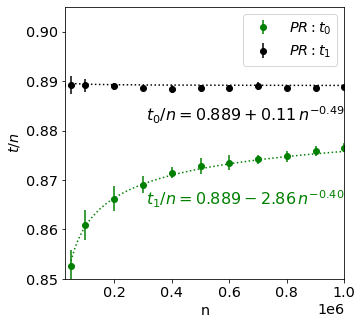

In [40]:
#t/n for PR
Nsweep = np.linspace(0.5e5, 10e5, 10001)
plt.figure(figsize=(5, 5))
plt.errorbar(Nvals, np.mean(t0valsPR, axis = 1)/Nvals, np.std(t0valsPR, axis = 1)/Nvals, fmt='go', label = r'$PR: t_0$')
plt.errorbar(Nvals, np.mean(t1valsPR, axis = 1)/Nvals, np.std(t1valsPR, axis = 1)/Nvals, fmt='ko', label = r'$PR: t_1$')
plt.plot(Nsweep, powLaw(Nsweep,0.891,-0.96,-0.30), 'g:')
plt.plot(Nsweep, powLaw(Nsweep,0.889,0.11,-0.49), 'k:')
plt.xlabel('n')
plt.ylabel(r'$t/n$')
plt.text(0.31e6, 0.865, r'$t_1/n = 0.889 - 2.86\, n^{- 0.40}  $', color='g', size=16)
plt.text(0.31e6, 0.882, r'$t_0/n = 0.889 + 0.11\, n^{- 0.49}  $', color='k', size=16)

plt.xlim([0.3e5, 1e6])
plt.ylim([0.85, 0.905])
plt.legend()
plt.savefig("tScaling.png", bbox_inches='tight', dpi=600)

$\Delta C_{max}/n = $ 0.3932974875764549 n^ -0.0686653134080069
a= 0.3932974875764549 +/- 0.00011630986020878539
b= -0.0686653134080069 +/- 8.049391313792161e-06


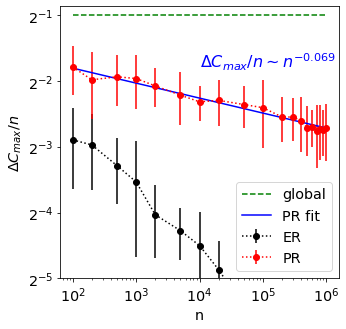

In [36]:
def normalPowerLaw(n,a,b):
    return a*np.power(n,b)

#power law
popt, pcov = curve_fit(normalPowerLaw, Nvals, np.mean(maxEdgePR, axis = 1)/Nvals*scalePR, maxfev=1000000, bounds=([0.0, -1.0], [100.0, 0.0]))

#popt, pcov = curve_fit(powLaw, Nvals, np.mean(t0valsPR, axis = 1)/Nvals*scalePR, sigma = np.std(t0valsPR, axis = 1)/Nvals)
err = np.diag(pcov)
print(r'$\Delta C_{max}/n = $', popt[0], 'n^', popt[1])
print('a=', popt[0], '+/-', err[0])
print('b=', popt[1], '+/-', err[1])


Nsweep = np.linspace(100, 1e6)

#maximum impact of single edge
plt.figure(figsize=(5, 5))
plt.errorbar(Nvals, np.mean(maxEdgeER, axis = 1)/Nvals, np.std(maxEdgeER, axis = 1)/Nvals, fmt='ko:', label = 'ER')
plt.errorbar(Nvals, np.mean(maxEdgePR, axis = 1)/Nvals, np.std(maxEdgePR, axis = 1)/Nvals, fmt='ro:', label = 'PR')
plt.plot(Nsweep, 0.5*np.ones(len(Nsweep)), 'g--', label='global')
plt.plot(Nsweep, normalPowerLaw(Nsweep,popt[0], popt[1]), 'b', label='PR fit')
plt.xlabel('n')
plt.ylabel(r'$\Delta C_{max}/n$')
plt.xscale('log')
plt.yscale('log', basey=2)
plt.text(1e4, 2**(-1.8), r'$\Delta C_{max}/n \sim n^{-0.069}$', color='b', size=16)

plt.ylim([1/32,0.55])
plt.legend(loc = 'lower right')
plt.savefig("SingleEdgeScaling.png", bbox_inches='tight', dpi=600)


Calculating best minimal value for power law fit
/home/joelh/.local/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


2.0125945390594238 0.011036493712154169 0.888 0.098741


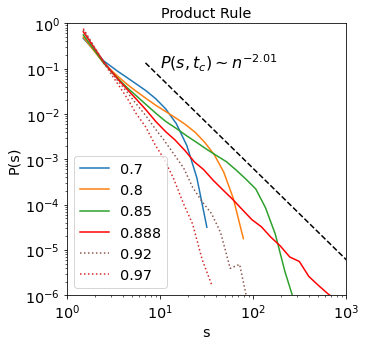

In [48]:
#Analyse component size distribution PR:

with h5py.File('PR_N1000000_seed1000010_r1.0.hdf5', "r") as f:
    cs = f['compsize']
    compsize = cs[:]
    sds = f['saveDisc']
    saveDisc  = sds[:]    
    sss = f['saveSize']
    saveSize  = sss[:]   
    sns = f['snapshots']
    snapshots  = sns[:] 

snapshots = np.sort(np.unique(snapshots))
    
N = int(1e6)    
plt.figure(figsize=(5, 5))
run = 70
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N)
run = 80
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N)
run = 85
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N)
run = 96
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N, color = 'r')
fitPR = powerlaw.Fit(saveSize[run][np.where(saveDisc[run] == 0)[0]], discrete = True)
fitPR.power_law.plot_pdf(color = 'k', linestyle = '--')
print(fitPR.power_law.alpha, fitPR.power_law.sigma, snapshots[run]/N, max(saveSize[run]/N))
run = 110
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N, linestyle = ':', color = 'tab:brown')
run = 115
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N, linestyle = ':')
plt.text(10, 0.1, r'$P(s, t_c) \sim n^{-2.01}$', color='k', size=16)
plt.xlabel('s')
plt.ylabel('P(s)')

plt.xlim([1,1000])
plt.ylim([1e-6,1.0])
plt.legend(loc='lower left')
plt.title('Product Rule')
plt.savefig("PRclusterSizeDist.png", bbox_inches='tight', dpi=600)


Calculating best minimal value for power law fit
/home/joelh/.local/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


2.460295542988738 0.011568534691504628 0.5 0.008157


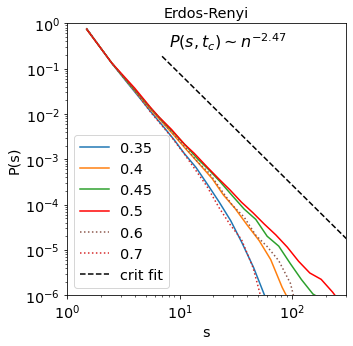

In [43]:
#Analyse component size distribution PR:
with h5py.File('ER_N1000000_seed1000005_r1.0.hdf5', "r") as f:
    cs = f['compsize']
    compsize = cs[:]
    sds = f['saveDisc']
    saveDisc  = sds[:]    
    sss = f['saveSize']
    saveSize  = sss[:]   
    sns = f['snapshots']
    snapshots  = sns[:] 

snapshots = np.sort(np.unique(snapshots))
    
N = int(1e6)    
plt.figure(figsize=(5, 5))
run = 35
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N)
run = 40
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N)
run = 45
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N)
run = 50
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N, color = 'r')
fitER = powerlaw.Fit(saveSize[run][np.where(saveDisc[run] == 0)[0]], discrete = True)
print(fitER.power_law.alpha, fitER.power_law.sigma, snapshots[run]/N, max(saveSize[run]/N))
run = 60
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N, linestyle = ':', color = 'tab:brown')
run = 70
powerlaw.plot_pdf(saveSize[run][np.where(saveDisc[run] == 0)[0]], label = snapshots[run]/N, linestyle = ':')
fitER.power_law.plot_pdf(color = 'k', linestyle = '--', label = 'crit fit')
plt.text(8, 0.3, r'$P(s, t_c) \sim n^{-2.47}$', color='k', size=16)
plt.xlabel('s')
plt.ylabel('P(s)')
plt.xlim([1,300])
plt.ylim([1e-6,1.0])
plt.legend()
plt.title('Erdos-Renyi')
plt.savefig("ERclusterSizeDist.png", bbox_inches='tight', dpi=600)


In [4]:
def add_ER_edge(G, N):
    added = False
    while not added:
        edge = np.random.choice(range(N), size = 2, replace = False)
        if G.has_edge(edge[0], edge[1]):
            continue
        G.add_edge(edge[0], edge[1])
        added = True
    return [edge[0], edge[1]]

N = int(20)
G = nx.empty_graph(N)
steps = int(1.5*N)


compLS = {i:{i} for i in range(N)}
compID = np.arange(N)
compSZ = np.ones(N)
discad = np.zeros(N, dtype=bool) #stores list of discarded components
curMax = 1

C_ER  = np.zeros(steps)

G_temp = G.copy()
for i in range(steps):
    nds = add_ER_edge(G_temp, N)
    if compID[nds[0]] != compID[nds[1]]:
        if compSZ[compID[nds[0]]] >= compSZ[compID[nds[1]]]:
            big = nds[0]
            sma = nds[1]
        else:
            big = nds[1]
            sma = nds[0]
        discad[compID[sma]] = True
        compSZ[compID[big]] += compSZ[compID[sma]]
        if compSZ[compID[big]] > curMax:
            curMax = compSZ[compID[big]]
        oldID = compID[sma]
        for j in compLS[compID[sma]]:
            compID[j] = compID[big]
        compLS[compID[big]] = compLS[compID[big]] | compLS[oldID] 
    
    if i == 5:
        G1 = G_temp.copy();

    if i == 20:
        G2 = G_temp.copy();        
        
    C_ER[i] = curMax
    

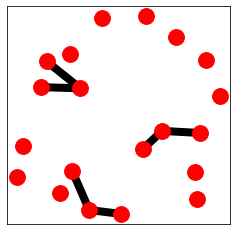

In [21]:
plt.figure(figsize=(4, 4))
G = G1;
pos = nx.spring_layout(G, k = 0.6);
nx.draw_networkx_nodes(G, pos, node_color='r',node_size=250)
nx.draw_networkx_edges(G,pos,width=8.0)
plt.savefig("noglobal.png", bbox_inches='tight', dpi=600)

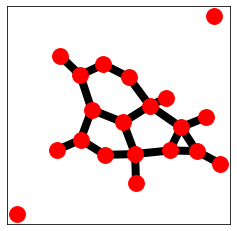

In [379]:
plt.figure(figsize=(4, 4))
G = G2;
pos = nx.spring_layout(G, k = 0.3);
nx.draw_networkx_nodes(G, pos, node_color='r',node_size=250)
nx.draw_networkx_edges(G,pos,width=8.0)
plt.savefig("global.png", bbox_inches='tight', dpi=600)